## Using Crow-AMSAA Method to Forecast Failures by Months from Start of Sales

Like most statistical based models, Crow-AMSAA (C-A) model assumes failures are IID (independent and identically distributed).  Failures that are influenced by season/temperature will not be modeled very well with C-A model.  However, unlike other statistical based models, C-A can be used to forecast failures by calendar months, instead of age of the units.

#### Background

The Crow-AMSAA (C-AMSAA or C-A) model, also known as the Crow's Extended Model, is a reliability growth model commonly used in reliability engineering to analyze and predict the failure behavior of systems. It is an extension of the original AMSAA (Armstrong, Mease, and Stearman) model. The model is primarily designed for situations where failures occur randomly and independently over time.

#### Crow-AMSAA equation for cumulative number of failures:

$n(t)=\lambda t^\beta$

#### Estimating C-A parameters: $\beta$ and $\lambda$ using simple linear regression

To convert this equation above into a linear form, we simply apply the log on both sides of the equation:

$\underbrace{\ln n(t)}=\underbrace{\beta} \underbrace{\ln t} + \underbrace{\ln \lambda}$

$\space\space\space\space y \space\space\space\space\space = \space\space m \space \cdot \space x \space\space + \space\space b$

Now, we can easily see that $\beta$ is just the slope ($m$) of the regression line and $\lambda$ is $e$ raised to the y-intercept ($b$):<br>

$\large{ln(\lambda) = b}$<br>

To solve for $\lambda$, we just need to take the anti-log of both sides of the equation:

$\large{\lambda = e^{b}}$

## Linear Regression of C-A Parameters Using Python

In [1]:
from numpy import log as ln
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_rows=1000

#### Input Data

Data needed for Crow-AMSAA is just a table where one column is months from start of sales and another column containing cumulative failures

Sample data was copied from the "clipboard"

In [2]:
df = pd.read_clipboard()

In [3]:
df.head()

,MFSS,CUMULATIVE_FAILURES
0,4,1
1,5,1
2,6,2
3,7,2
4,8,2


In [4]:
df.tail()

,MFSS,CUMULATIVE_FAILURES
50,54,122
51,55,127
52,56,128
53,57,136
54,58,138


#### Plot months from start of sales (MFSS) on X axis and Cumulative Failures on Y axis on Log Scale

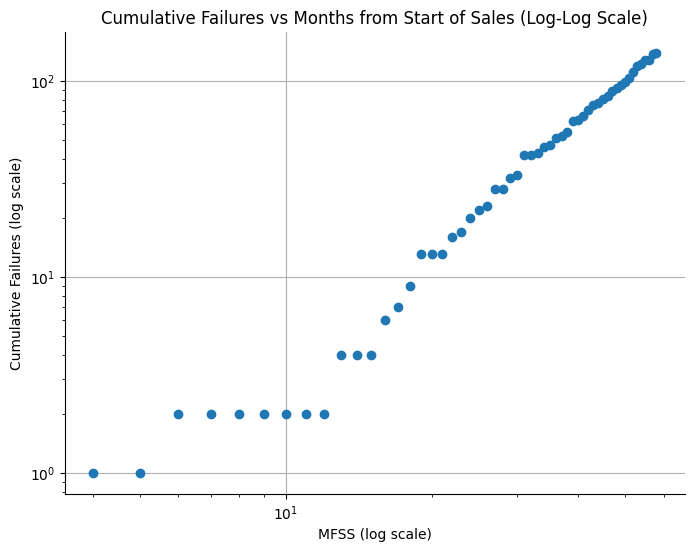

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.plot(df['MFSS'], df['CUMULATIVE_FAILURES'], marker='o', linestyle='')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.title('Cumulative Failures vs Months from Start of Sales (Log-Log Scale)')
# Alternatively, we can do plt.loglog(), but the above is more explicit, which I prefer
# plt.loglog(df['Cumulative Time In Days'], df['Failure Number'], marker='o', linestyle='')cale)')
plt.xlabel('MFSS (log scale)')
plt.ylabel('Cumulative Failures (log scale)')
plt.grid(True)
plt.show()

#### Apply Linear Regression / Best Fit Line

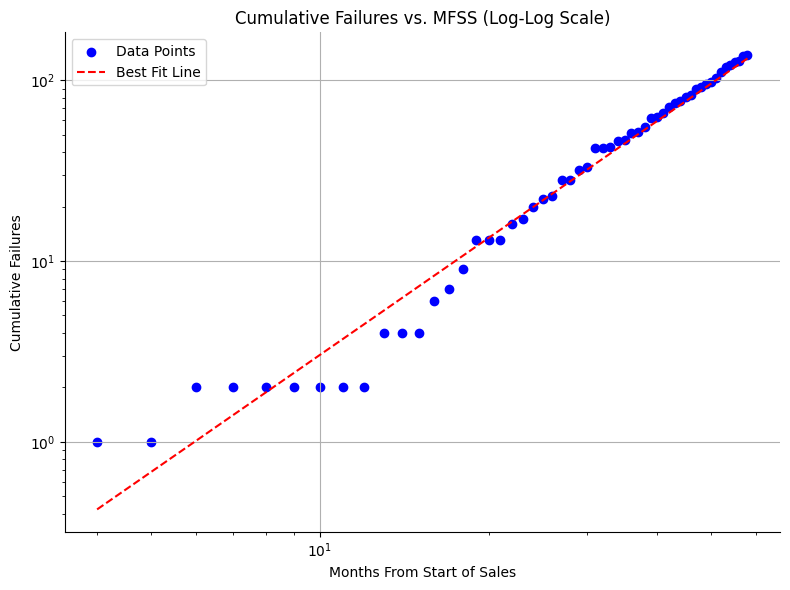

Fitted Line Equation: y = -3.84 * x^2.15
Slope: 2.1486
Intercept: -3.8397
R-squared: 0.9688


In [6]:
# Extract the data
cumulative_days = df['MFSS']
cumulative_failures = df['CUMULATIVE_FAILURES']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ln(cumulative_days), ln(cumulative_failures))

# Create a log-log scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.scatter(cumulative_days, cumulative_failures, marker='o', color='b', label='Data Points')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale

# Plot the best-fit line
x_fit = np.linspace(min(cumulative_days), max(cumulative_days))
y_fit = np.exp(intercept) * (x_fit**slope)
plt.plot(x_fit, y_fit, color='r', linestyle='--', label='Best Fit Line')

plt.title('Cumulative Failures vs. MFSS (Log-Log Scale)')
plt.xlabel('Months From Start of Sales')
plt.ylabel('Cumulative Failures')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

# Print the fitted line equation, slope and intercept of the best-fit line
print(f"Fitted Line Equation: y = {intercept:.2f} * x^{slope:.2f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Forecast Using Estimated $\lambda$ and $\beta$ Crow-AMSAA Parameters and Compare with Actual

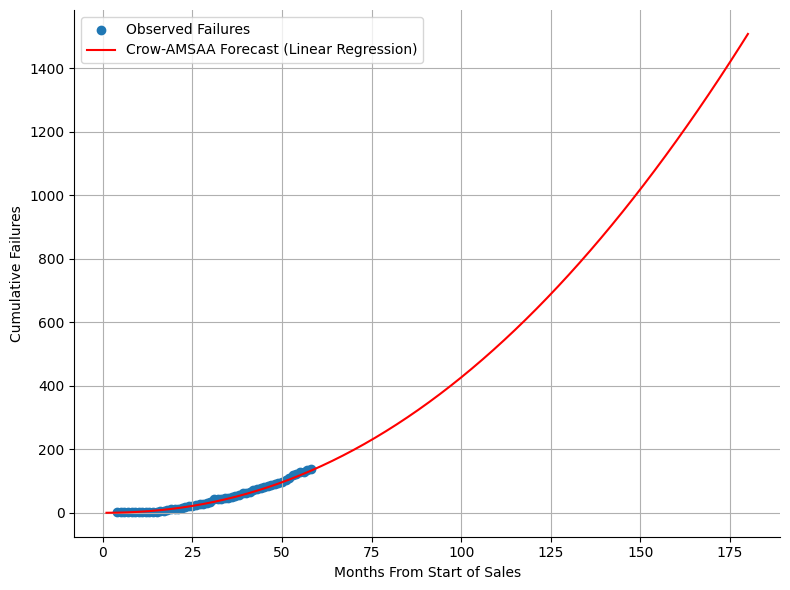

Lambda Estimate: 0.021501018296236164
Beta Estimate: 2.148628364929245


In [7]:
# Extract estimated parameters
lambda_estimate = np.exp(intercept)
beta_estimate = slope

# Forecast future failures using the model
forecast_time = np.arange(1, 181, 1)  # Requestors want forecast after 15 years or 180 months
forecast_log_failures = intercept + slope * ln(forecast_time)
forecast_failures = np.exp(forecast_log_failures)

# Plot the original data and the fitted model
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.scatter(df['MFSS'], df['CUMULATIVE_FAILURES'], label='Observed Failures')
plt.plot(forecast_time, forecast_failures, label='Crow-AMSAA Forecast (Linear Regression)', color='red')
plt.xlabel('Months From Start of Sales')
plt.ylabel('Cumulative Failures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the estimated parameters
print("Lambda Estimate:", lambda_estimate)
print("Beta Estimate:", beta_estimate)

## How do we save our forecast data?

#### Creating pandas dataframe containing our forecast data

We have our forecast time values in a numpy array:

In [8]:
forecast_time

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180])

We also have our failure quantities in a numpy array:

In [9]:
forecast_failures

array([2.15010183e-02, 9.53368100e-02, 2.27832298e-01, 4.22729157e-01,
       6.82787884e-01, 1.01022213e+00, 1.40689164e+00, 1.87440654e+00,
       2.41419058e+00, 3.02752260e+00, 3.71556524e+00, 4.47938576e+00,
       5.31997158e+00, 6.23824225e+00, 7.23505884e+00, 8.31123148e+00,
       9.46752548e+00, 1.07046664e+01, 1.20233444e+01, 1.34242175e+01,
       1.49079151e+01, 1.64750400e+01, 1.81261714e+01, 1.98618662e+01,
       2.16826612e+01, 2.35890744e+01, 2.55816064e+01, 2.76607418e+01,
       2.98269501e+01, 3.20806866e+01, 3.44223936e+01, 3.68525009e+01,
       3.93714267e+01, 4.19795782e+01, 4.46773521e+01, 4.74651356e+01,
       5.03433064e+01, 5.33122332e+01, 5.63722766e+01, 5.95237890e+01,
       6.27671153e+01, 6.61025932e+01, 6.95305533e+01, 7.30513197e+01,
       7.66652099e+01, 8.03725356e+01, 8.41736026e+01, 8.80687109e+01,
       9.20581554e+01, 9.61422256e+01, 1.00321206e+02, 1.04595376e+02,
       1.08965012e+02, 1.13430383e+02, 1.17991757e+02, 1.22649395e+02,
      

We can easily create a pandas dataframe containing our time (months) and failure quantities:

In [10]:
df_forecast = pd.DataFrame(
    {
        'MFSS': forecast_time,
        'Cumulative Failures': forecast_failures
    }
)

In [11]:
df_forecast

,MFSS,Cumulative Failures
0,1,0.021501
1,2,0.095337
2,3,0.227832
3,4,0.422729
4,5,0.682788
5,6,1.010222
6,7,1.406892
7,8,1.874407
8,9,2.414191
9,10,3.027523


#### Send forecast to "clipboard" so that we can copy into Excel

In [12]:
df_forecast.to_clipboard(index=False)

#### To obtain the forecast at any time $t$, we can refer to the Crow-AMSAA equation:

$n(t)=\lambda t^\beta$

Which represents the cumulative number of failures after some time $t$.

However, we plotted our data on log scale to obtain the $\lambda$ and $\beta$ parameters via linear regression:

$\underbrace{\ln n(t)}=\underbrace{\beta} \underbrace{\ln t} + \underbrace{\ln \lambda}$

$\space\space\space\space y \space\space\space\space\space = \space\space m \space \cdot \space x \space\space + \space\space b$

So we need to revert to the non-log version of the equation.  In order to do so, we know from high school math,<br>
we need to just take the anti-log or take $e$ raised to both sides of the equation:

$e^{\ln n(t)} = e^{\beta \ln t + \ln \lambda}$

Now, if we want to know the cumulative failures after 180 months (15 years):

In [13]:
np.exp((beta_estimate * ln(180)) + ln(lambda_estimate))

1507.306263606324

## Using MLE to estimate Crow-AMSAA Parameters

Instead of using linear regression to estimate C-A parameters, we can opt to use MLE (maximum likelihood estimation) to estimate C-A parameters.

See this Reliasoft [article](https://www.hbkworld.com/en/knowledge/resource-center/articles/the-change-of-slope-methodology-in-reliability-growth-analysis) for the MLE equations.